In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df_feat = pd.read_csv('pre_pro.csv', encoding="ISO-8859-1",index_col=0)
df_feat.head()

,gender,age,num_callouts,num_diagnoses,num_procedures,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,...,OTHER RELIGION,PROTESTANT QUAKER,marital_status_MARRIED,marital_status_SINGLE,CAUCASIAN,OTHER ETHNICITY,WHITE,admission_origin_Clinic referral/Premature,admission_origin_EMERGENCY ROOM ADMISSION,admission_origin_Physical referral/Normal deli
0,0,66,1.0,2.0,0.0,1.0,7.0,37.0,3.0,0.0,...,0,0,0,0,0,0,1,1,0,0
1,0,26,1.0,0.0,1.0,2.0,51.0,44.0,2.0,1.0,...,0,0,0,1,0,0,0,0,1,0
2,0,51,0.0,1.0,1.0,1.0,63.0,48.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1,51,0.0,1.0,0.0,1.0,3.0,22.0,1.0,0.0,...,1,0,1,0,0,0,0,0,0,0
4,1,72,1.0,2.0,1.0,1.0,2.0,18.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [3]:
df_feat.shape

(48976, 36)

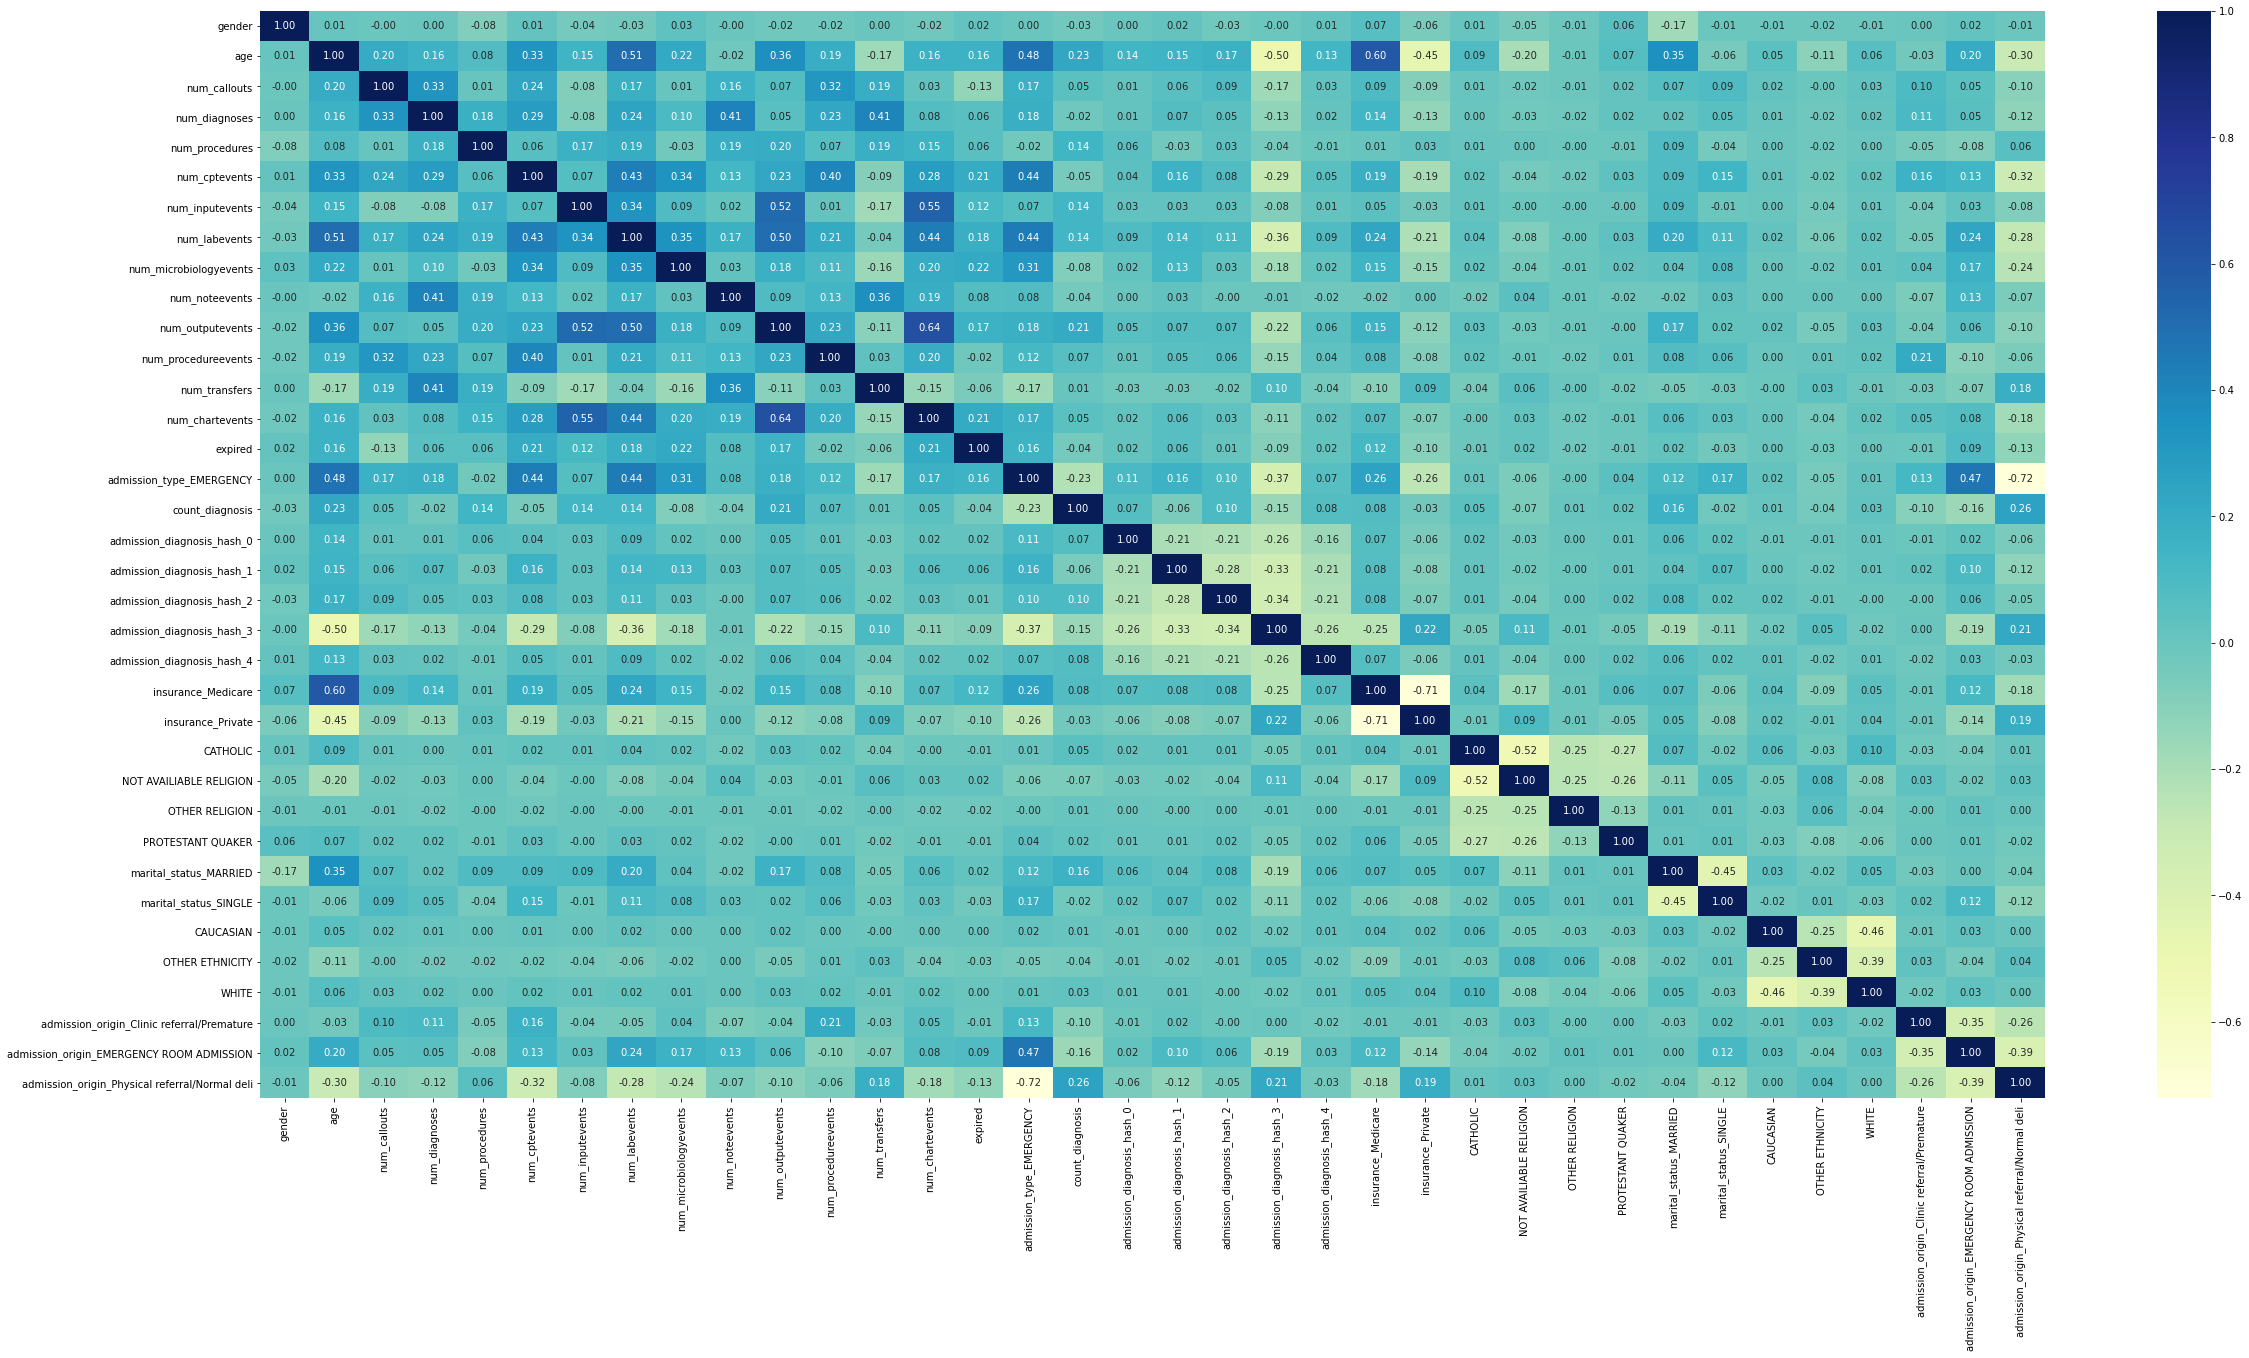

In [4]:
#correlation matrix
plt.figure(figsize=(40,20))
sns.heatmap(df_feat.corr(),fmt=".2f",cmap="YlGnBu", annot=True)

In [5]:
target = pd.read_csv('target.csv', encoding="ISO-8859-1",index_col=0)
target.head()

,target
0,1
1,1
2,3
3,2
4,2


In [6]:
df_all = pd.concat([df_feat,target], axis=1)
print(df_all.shape)
df_all.head()

(48976, 37)


,gender,age,num_callouts,num_diagnoses,num_procedures,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,...,PROTESTANT QUAKER,marital_status_MARRIED,marital_status_SINGLE,CAUCASIAN,OTHER ETHNICITY,WHITE,admission_origin_Clinic referral/Premature,admission_origin_EMERGENCY ROOM ADMISSION,admission_origin_Physical referral/Normal deli,target
0,0,66,1.0,2.0,0.0,1.0,7.0,37.0,3.0,0.0,...,0,0,0,0,0,1,1,0,0,1
1,0,26,1.0,0.0,1.0,2.0,51.0,44.0,2.0,1.0,...,0,0,1,0,0,0,0,1,0,1
2,0,51,0.0,1.0,1.0,1.0,63.0,48.0,3.0,0.0,...,0,0,0,0,0,0,0,1,0,3
3,1,51,0.0,1.0,0.0,1.0,3.0,22.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,2
4,1,72,1.0,2.0,1.0,1.0,2.0,18.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,2


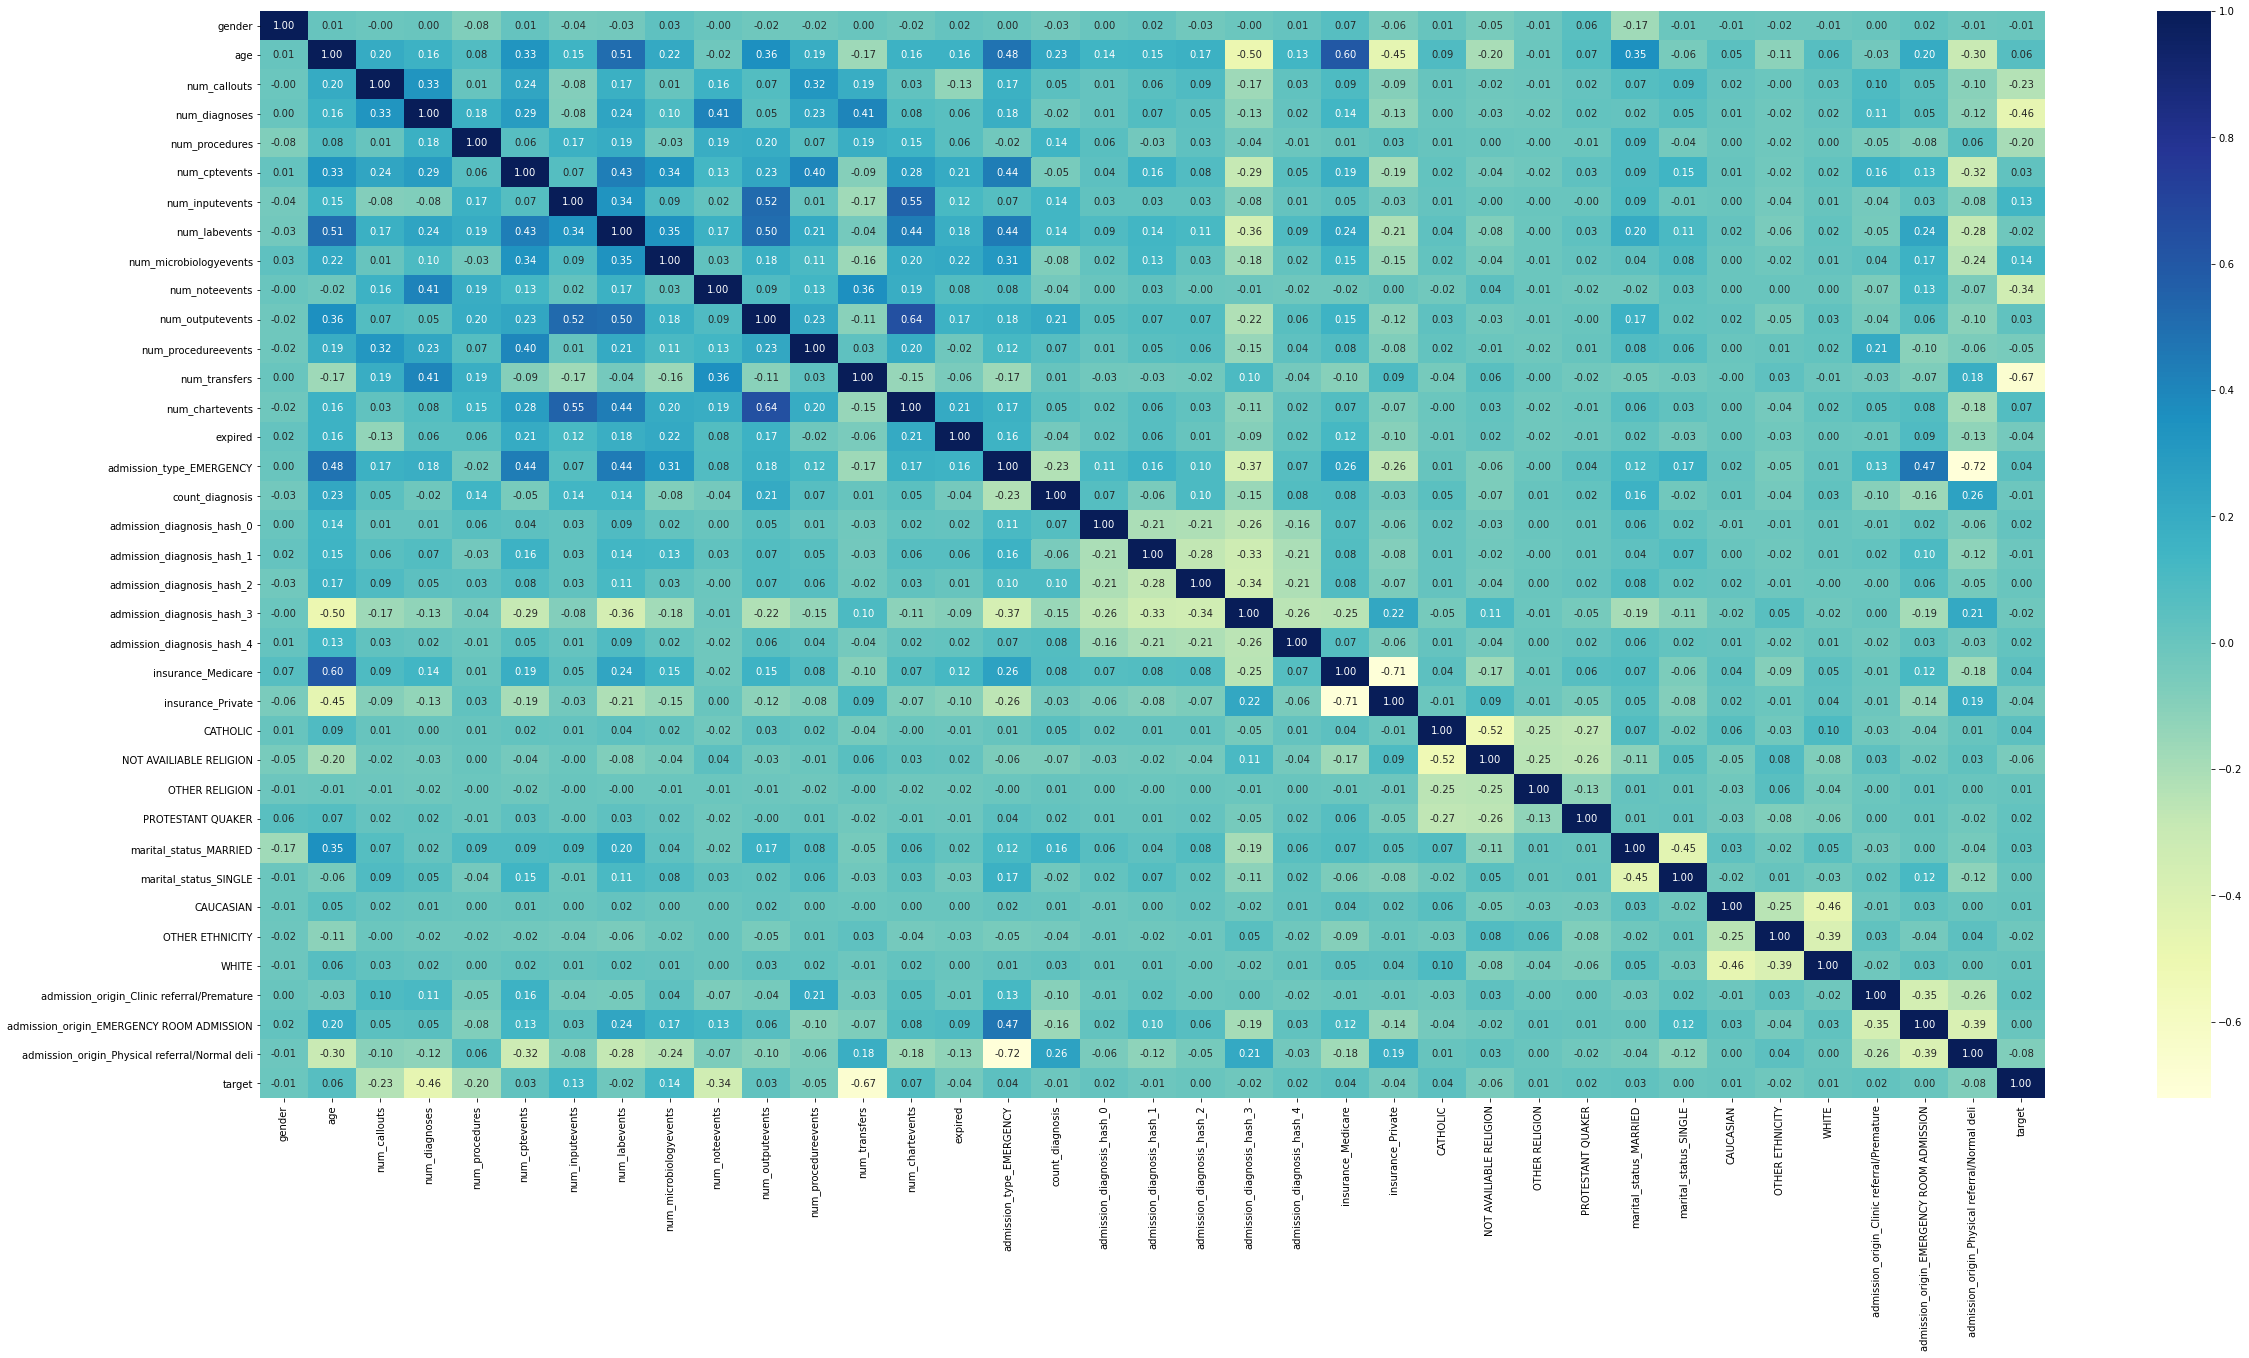

In [7]:
#correlation matrix
plt.figure(figsize=(40,20))
sns.heatmap(df_all.corr(),fmt=".2f",cmap="YlGnBu", annot=True)

In [8]:
df_all.columns

Index(['gender', 'age', 'num_callouts', 'num_diagnoses', 'num_procedures',
       'num_cptevents', 'num_inputevents', 'num_labevents',
       'num_microbiologyevents', 'num_noteevents', 'num_outputevents',
       'num_procedureevents', 'num_transfers', 'num_chartevents', 'expired',
       'admission_type_EMERGENCY', 'count_diagnosis',
       'admission_diagnosis_hash_0', 'admission_diagnosis_hash_1',
       'admission_diagnosis_hash_2', 'admission_diagnosis_hash_3',
       'admission_diagnosis_hash_4', 'insurance_Medicare', 'insurance_Private',
       'CATHOLIC', 'NOT AVAILIABLE RELIGION', 'OTHER RELIGION',
       'PROTESTANT QUAKER', 'marital_status_MARRIED', 'marital_status_SINGLE',
       'CAUCASIAN', 'OTHER ETHNICITY', 'WHITE',
       'admission_origin_Clinic referral/Premature',
       'admission_origin_EMERGENCY ROOM ADMISSION',
       'admission_origin_Physical referral/Normal deli', 'target'],
      dtype='object')

In [9]:
df_all.to_csv("pre_pro_final.csv",index=False)

In [10]:
#train, test split
from sklearn.model_selection import train_test_split

X = df_all.drop('target',1) # Features
y = df_all['target'] # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)



In [11]:
X_train

,gender,age,num_callouts,num_diagnoses,num_procedures,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,...,OTHER RELIGION,PROTESTANT QUAKER,marital_status_MARRIED,marital_status_SINGLE,CAUCASIAN,OTHER ETHNICITY,WHITE,admission_origin_Clinic referral/Premature,admission_origin_EMERGENCY ROOM ADMISSION,admission_origin_Physical referral/Normal deli
2764,1,72,0.0,2.0,0.0,0.0,60.0,66.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
14093,0,21,1.0,1.0,0.0,1.0,8.0,32.0,0.0,2.0,...,0,0,0,1,0,0,1,0,0,0
34697,1,48,1.0,1.0,0.0,1.0,4.0,32.0,0.0,0.0,...,0,0,1,0,0,0,1,1,0,0
47557,0,71,1.0,2.0,1.0,0.0,18.0,21.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
22144,1,43,0.0,1.0,1.0,0.0,0.0,33.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,67,0.0,0.0,0.0,1.0,14.0,50.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
45891,0,0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
42613,0,72,1.0,3.0,1.0,1.0,10.0,40.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
43567,1,79,2.0,3.0,0.0,1.0,4.0,37.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
scale_option = True
if scale_option == True:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


In [13]:
from imblearn.over_sampling import SMOTE


smote_option = True
if smote_option == True:
    sm = SMOTE(random_state=None)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


In [14]:
print(X_train_res.shape)
print(X_train.shape)
print(y_train_res.shape)
print(y_train.shape)


(91590, 36)
(36732, 36)
(91590,)
(36732,)


In [15]:
kfold = StratifiedKFold(n_splits=10)

#### Dont run

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


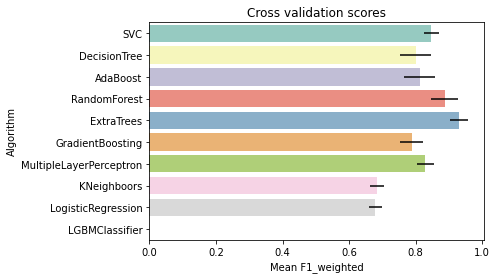

In [92]:

# Modeling step Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier(random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LGBMClassifier(random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_res, y = Y_train_res, scoring = "f1_weighted", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LGBMClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean F1_weighted")
g = g.set_title("Cross validation scores")

In [93]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.846799,0.022894,SVC
1,0.800184,0.046970,DecisionTree
2,0.812017,0.047186,AdaBoost
3,0.887456,0.041074,RandomForest
4,0.930275,0.028205,ExtraTrees
5,0.787869,0.035770,GradientBoosting
6,0.828534,0.025488,MultipleLayerPerceptron
7,0.684132,0.020194,KNeighboors
8,0.678301,0.019413,LogisticRegression
9,NaN,NaN,LGBMClassifier


## Continue

In [16]:
print('Resampled dataset shape %s' % Counter(y_train_res))


Resampled dataset shape Counter({1: 18318, 2: 18318, 4: 18318, 3: 18318, 0: 18318})


In [17]:
print("normal data distribution: {}".format(Counter(y)))
print("normal data distribution: {}".format(Counter(y_train)))

print("SMOTE data distribution: {}".format(Counter(y_train_res)))


normal data distribution: Counter({1: 24452, 2: 13086, 3: 7008, 4: 2515, 0: 1915})
normal data distribution: Counter({1: 18318, 2: 9850, 3: 5268, 4: 1871, 0: 1425})
SMOTE data distribution: Counter({1: 18318, 2: 18318, 4: 18318, 3: 18318, 0: 18318})


# Extra Trees

In [33]:
from sklearn.model_selection import GridSearchCV

In [35]:
etc_param_grid={'n_estimators':[50,100,150,200],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'class_weight':['balanced', 'balanced_subsample']}
ETC=ExtraTreesClassifier()
gsETC = GridSearchCV(ETC,param_grid = etc_param_grid, cv=kfold, scoring="f1_weighted", n_jobs= -1, verbose = 1)
gsETC.fit(X_train_res,y_train_res)
gsETC.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 69.6min finished


ExtraTreesClassifier(class_weight='balanced', criterion='entropy',
                     max_features='log2', n_estimators=150)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
best=gsETC.best_estimator_
preds=best.predict(X_test)
results = classification_report(y_test,preds)
print(results)

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       490
           1       0.85      0.88      0.86      6134
           2       0.60      0.57      0.58      3236
           3       0.53      0.54      0.53      1740
           4       0.59      0.54      0.56       644

    accuracy                           0.72     12244
   macro avg       0.66      0.64      0.65     12244
weighted avg       0.72      0.72      0.72     12244



# Extra Trees best with micro

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [24]:
ETC=ExtraTreesClassifier(n_estimators=150,criterion='entropy',max_features='log2',class_weight='balanced')
ETC.fit(X_train_res,y_train_res)
preds=ETC.predict(X_test)
results = classification_report(y_test,preds)
print(results)
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       490
           1       0.85      0.88      0.86      6134
           2       0.61      0.58      0.59      3236
           3       0.54      0.55      0.54      1740
           4       0.59      0.54      0.56       644

    accuracy                           0.73     12244
   macro avg       0.67      0.64      0.66     12244
weighted avg       0.72      0.73      0.73     12244

0.655674481052454
0.727376674289448
0.725204181610043


# MLP

In [38]:
mlp_param_grid={'hidden_layer_sizes':[(50,),(50,10),(50,20),(100,),(100,10),(100,20),(150,),(150,10),(150,20)],'activation':['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'],'learning_rate_init':[0.0001,0.001]}
MLP=MLPClassifier()
gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="f1_weighted", n_jobs= -1, verbose = 1)
gsMLP.fit(X_train_res,y_train_res)
gsMLP.best_estimator_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 184.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 428.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 842.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 1080.8min finished
c:\users\mary\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 20))

In [39]:
best=gsMLP.best_estimator_
preds=best.predict(X_test)
results = classification_report(y_test,preds)
print(results)

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       490
           1       0.87      0.80      0.83      6134
           2       0.53      0.60      0.56      3236
           3       0.48      0.46      0.47      1740
           4       0.46      0.51      0.48       644

    accuracy                           0.68     12244
   macro avg       0.57      0.59      0.58     12244
weighted avg       0.69      0.68      0.68     12244



# MLP best with micro

In [25]:
MLP=MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 20))
MLP.fit(X_train_res,y_train_res)
preds=MLP.predict(X_test)
results = classification_report(y_test,preds)
print(results)
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

c:\users\mary\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.54      0.68      0.60       490
           1       0.86      0.80      0.83      6134
           2       0.53      0.59      0.56      3236
           3       0.49      0.47      0.48      1740
           4       0.48      0.56      0.51       644

    accuracy                           0.68     12244
   macro avg       0.58      0.62      0.60     12244
weighted avg       0.69      0.68      0.68     12244

0.5958569608211499
0.6760045736687357
0.6810147224372942


# Decision Trees

In [40]:
dt_param_grid={'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'min_samples_split':[2,3,4,5],'max_features':['auto', 'sqrt', 'log2']}
DT=DecisionTreeClassifier()
gsDT = GridSearchCV(DT,param_grid = dt_param_grid, cv=kfold, scoring="f1_weighted", n_jobs= -1, verbose = 1)
gsDT.fit(X_train_res,y_train_res)
gsDT.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   47.0s finished


DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       splitter='random')

In [41]:
best=gsDT.best_estimator_
preds=best.predict(X_test)
results = classification_report(y_test,preds)
print(results)

              precision    recall  f1-score   support

           0       0.43      0.55      0.48       490
           1       0.81      0.77      0.79      6134
           2       0.47      0.47      0.47      3236
           3       0.41      0.42      0.41      1740
           4       0.40      0.47      0.43       644

    accuracy                           0.62     12244
   macro avg       0.50      0.54      0.52     12244
weighted avg       0.63      0.62      0.62     12244



# Decision Trees best with micro

In [26]:
DT=DecisionTreeClassifier(criterion='entropy', max_features='sqrt',splitter='random')
DT.fit(X_train_res,y_train_res)
preds=DT.predict(X_test)
results = classification_report(y_test,preds)
print(results)
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

              precision    recall  f1-score   support

           0       0.40      0.53      0.46       490
           1       0.80      0.76      0.78      6134
           2       0.46      0.45      0.46      3236
           3       0.40      0.42      0.41      1740
           4       0.38      0.47      0.42       644

    accuracy                           0.61     12244
   macro avg       0.49      0.53      0.50     12244
weighted avg       0.62      0.61      0.61     12244

0.5039756945940379
0.6053577262332571
0.6095371000283226


# Random Forest best with micro

In [20]:
RF=RandomForestClassifier(max_depth=None, max_features='sqrt',n_estimators=150)
RF.fit(X_train_res,y_train_res)
preds=RF.predict(X_test)
results = classification_report(y_test,preds)
print(results)
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       490
           1       0.87      0.86      0.87      6134
           2       0.61      0.64      0.63      3236
           3       0.57      0.53      0.55      1740
           4       0.61      0.60      0.61       644

    accuracy                           0.74     12244
   macro avg       0.68      0.69      0.68     12244
weighted avg       0.74      0.74      0.74     12244

0.6813893817956961
0.7395459000326691
0.7395212625599533
